In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree

import SweetSpotPrediction as ssp

# 02 Base model
A simiple model to help understand the data (and help with feature engineering in 01)

*Note: Run 01 to build the .csv files needed*

In [2]:
df = pd.read_csv('ClassificationData.csv')
df.head()

,Unnamed: 0,XPos,YPos,Random1,Random2,WellPresent
0,0,0,0,30.539818,43.245462,0
1,1,1,0,5.224166,21.452538,0
2,2,2,0,1.238728,21.125614,1
3,3,0,1,5.683362,51.689841,1
4,4,1,1,94.328344,34.019446,0


In [3]:
# copy paste from 01

features = [
    'XPos', # propbably dont want these as features
    'YPos', # propbably dont want these as features
    'Random1',
    'Random2'

]

label_clf = 'WellPresent' 

In [4]:
X_train, X_, y_train, y_ = train_test_split(df[features], df[label_clf], test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=0.50, random_state=42)

Normalization ommited on purpose

In [5]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [6]:
y_pred_val = clf.predict(X_val)

In [7]:
ssp.ReportMetrics(clf, X_train, X_val, y_train, y_val, y_pred_val)

Precision: 0.000
Recall: 0.000
F1: 0.000


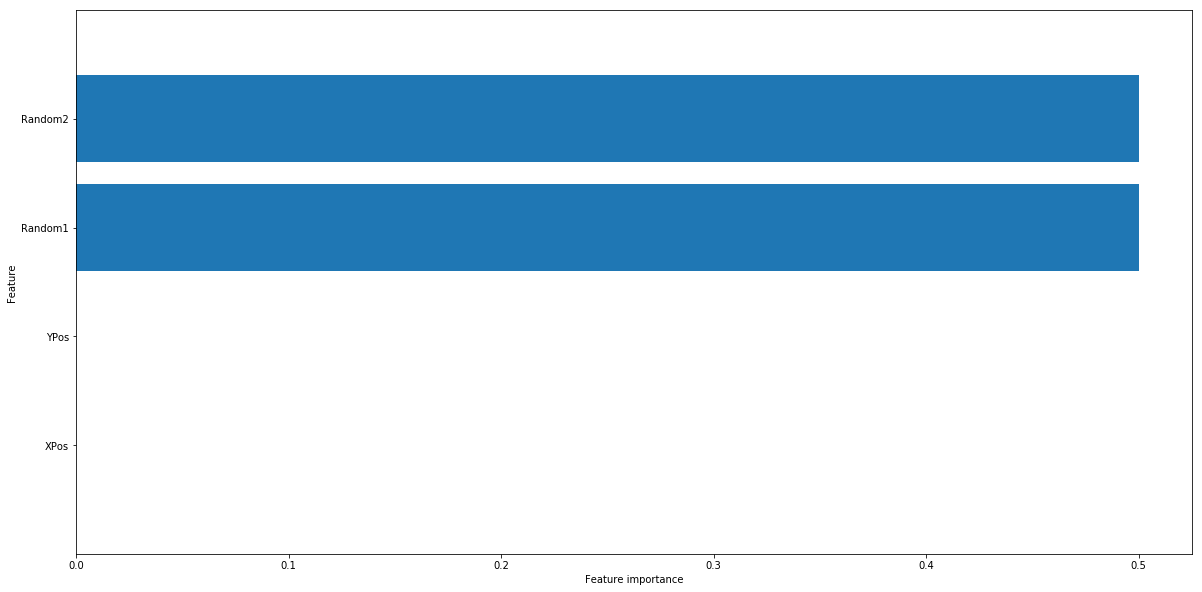

In [8]:
ssp.plot_feature_importances(clf,features)

maybe use
https://graphviz.gitlab.io/_pages/Download/Download_windows.html
to plot disision tree
(need some local path stuff setup, check with marco)

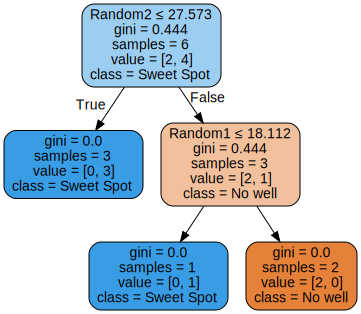

In [9]:
import graphviz 
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=features,  
                     class_names=['No well','Sweet Spot'],
                     filled=True, rounded=True,  
                      special_characters=True)  
graphviz.Source(dot_data) 

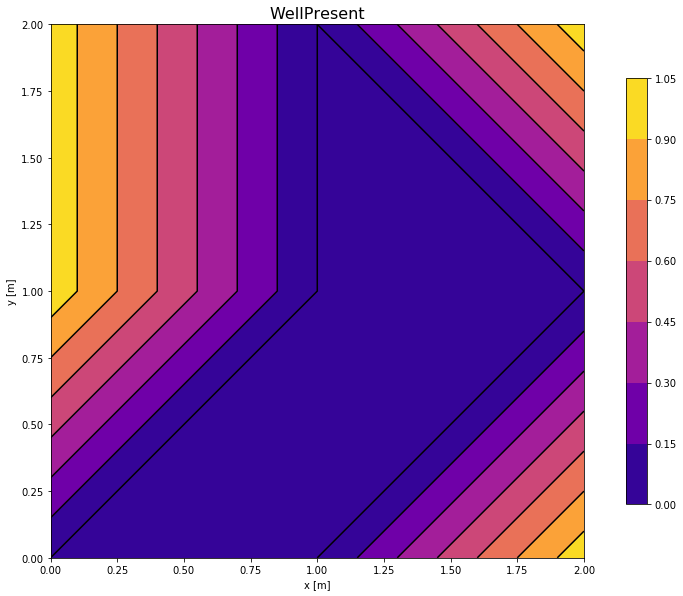

In [10]:
ssp.plot_map(df, label_clf)


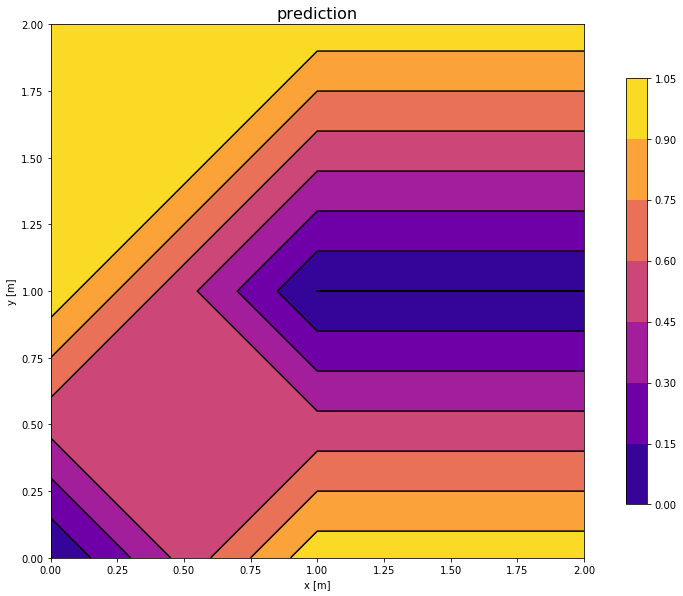

In [11]:
df['prediction'] = clf.predict(df[features])
ssp.plot_map(df, 'prediction')

# lets draw how certain the clasifications are

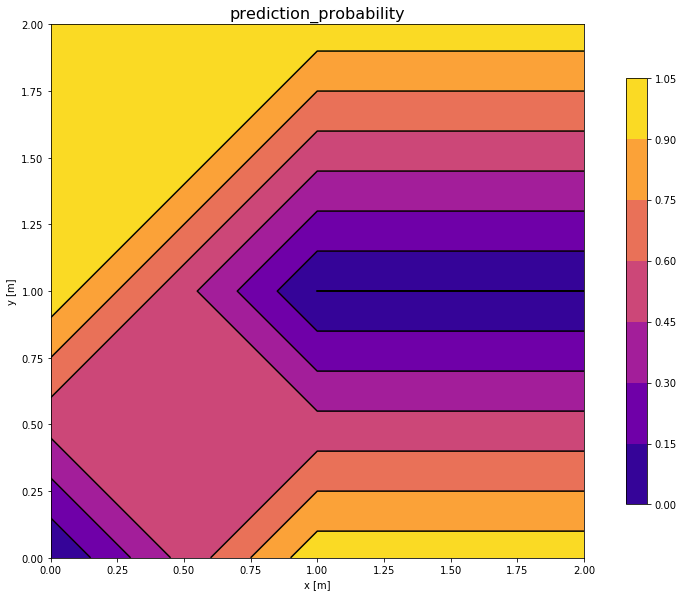

In [14]:
df['prediction_probability'] = clf.predict_proba(df[features])[:,1] # with 1 beeing the probability that there is a sweetspot
ssp.plot_map(df, 'prediction_probability')

# <a href="01 Data Preperation.ipynb">Previous</a> <a href="03 Exploration of models.ipynb">Next</a> Notebook